In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [12]:
# load the data
df = pd.read_csv("data.csv")

In [19]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
count,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,3.624800e+04,36248.000000
mean,1.845178,0.105302,0.810445,2.204508,0.516056,0.030926,0.708425,85.282360,3.552720,0.025546,0.023339,0.152919,103.435350,0.620034,2.017896e+07,0.672203
std,0.518671,0.402597,0.870938,1.410825,1.048506,0.173119,1.399401,85.961536,0.681269,0.157779,0.368432,1.753126,35.081308,0.786429,3.751200e+03,0.469417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.015100e+07,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2.018023e+07,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2.018061e+07,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2.018092e+07,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2.018123e+07,1.000000


/var/folders/lj/tcwl5glj0blfftjn4df0129r0000gn/T/ipykernel_39567/2361371769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['booking status'])


<Axes: xlabel='booking status', ylabel='Density'>

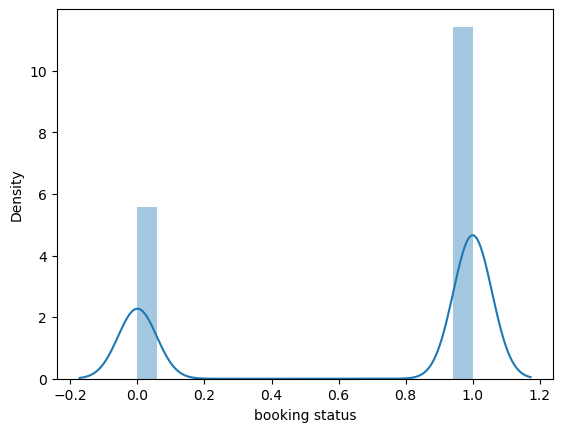

In [22]:
# quick chart, how is experience distributed in data
sns.distplot(df['booking status'])

# data is inbalanced
# the logreg could work worse

In [13]:
# X/y -split
X = df.drop('booking status', axis=1)
y = df['booking status']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [20]:
# make test predictions with new data with our model
predictions = logmodel.predict(X_test)

In [21]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67      3035
           1       0.82      0.89      0.86      6027

    accuracy                           0.80      9062
   macro avg       0.78      0.75      0.77      9062
weighted avg       0.80      0.80      0.80      9062


Model overall accuracy: 80.06%


In [ ]:
# results even worse
# maybe there is Non-linearity in data